# Part 2: Information-Driven Bars

**Advances in Financial Machine Learning - Chapter 2**

This notebook demonstrates the construction of information-driven bars from tick data:
- **Standard Bars**: Time, Tick, Volume, Dollar bars
- **Imbalance Bars**: Tick/Volume/Dollar imbalance bars
- **Runs Bars**: Tick/Volume/Dollar runs bars

**Why Information-Driven Bars?**

Traditional time-based sampling (hourly/daily bars) has poor statistical properties:
- Loses information during volatile periods
- Creates autocorrelation and non-normality in returns
- Ignores market microstructure

Information-driven bars sample based on market activity:
- Better statistical properties (closer to normality)
- More stable variance
- Superior features for machine learning models

In [2]:
# ## Setup and Imports

# %%
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Add src to path for imports
sys.path.append('../src')

from utils.data_loader import load_binance_data, get_available_symbols

# Import bar construction functions
from standard_bars import tick_bars, volume_bars, dollar_bars
from imbalance_bars import tick_imbalance_bars, volume_imbalance_bars, dollar_imbalance_bars
from runs_bars import tick_runs_bars, volume_runs_bars, dollar_runs_bars

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

In [3]:
# ## 1. Load Raw Tick Data

# Configuration
SYMBOL = 'BTCUSDT'  # Change to ETHUSDT, SOLUSDT, or POWRUSDT
DAYS = 7            # Number of days to process

# Load tick data
print(f"Loading {DAYS} days of tick data for {SYMBOL}...")
tick_data = load_binance_data(SYMBOL, days=DAYS)

print(f"\n✓ Loaded {len(tick_data):,} ticks")
print(f"Date range: {tick_data['timestamp'].min()} to {tick_data['timestamp'].max()}")
print(f"\nSample data:")
print(tick_data.head())

Loading 7 days of tick data for BTCUSDT...
Loading 7 days of BTCUSDT data...
Date range: 2025-09-30 to 2025-10-06
Loaded 6,846,332 ticks
Time range: 2025-09-29 16:00:00.090000 to 2025-10-06 15:59:59.532000
Price range: $112656.27 - $125708.42
Total volume: 124,543.36


✓ Loaded 6,846,332 ticks
Date range: 2025-09-29 16:00:00.090000 to 2025-10-06 15:59:59.532000

Sample data:
                timestamp      price   volume
0 2025-09-29 16:00:00.090  113815.57  0.00550
1 2025-09-29 16:00:00.153  113815.57  0.03000
2 2025-09-29 16:00:00.247  113815.58  0.17922
3 2025-09-29 16:00:00.286  113815.58  0.00007
4 2025-09-29 16:00:00.286  113815.58  0.00007


In [4]:
# ## 2. Standard Bars
#
# ### 2.1 Tick Bars
# Sample every N trades (ticks)

# Generate tick bars
TICK_THRESHOLD = 1000
print(f"Generating tick bars (threshold: {TICK_THRESHOLD:,})...")

t_bars = tick_bars(tick_data, threshold=TICK_THRESHOLD)
print(f"✓ Generated {len(t_bars):,} tick bars")
print(t_bars.head())

Generating tick bars (threshold: 1,000)...
✓ Generated 6,847 tick bars
                              open       high        low      close    volume  \
timestamp                                                                       
2025-09-29 16:01:16.438  113815.57  113887.82  113815.57  113875.00  32.89513   
2025-09-29 16:02:52.616  113875.00  113875.00  113823.96  113835.82  21.57491   
2025-09-29 16:05:36.406  113835.82  113875.00  113835.81  113875.00  12.81593   
2025-09-29 16:06:53.542  113875.00  113925.49  113859.00  113861.99  17.58215   
2025-09-29 16:08:35.281  113856.99  113856.99  113792.00  113792.00  17.69582   

                         tick_count  
timestamp                            
2025-09-29 16:01:16.438        1000  
2025-09-29 16:02:52.616        1000  
2025-09-29 16:05:36.406        1000  
2025-09-29 16:06:53.542        1000  
2025-09-29 16:08:35.281        1000  


In [5]:
# ### 2.2 Volume Bars
# Sample every N contracts traded


# Generate volume bars
VOLUME_THRESHOLD = 50.0
print(f"Generating volume bars (threshold: {VOLUME_THRESHOLD:,.2f})...")

v_bars = volume_bars(tick_data, threshold=VOLUME_THRESHOLD)
print(f"✓ Generated {len(v_bars):,} volume bars")
print(v_bars.head())


Generating volume bars (threshold: 50.00)...
✓ Generated 2,463 volume bars
                              open       high        low      close    volume  \
timestamp                                                                       
2025-09-29 16:02:23.696  113815.57  113887.82  113815.57  113835.35  50.10607   
2025-09-29 16:08:35.217  113835.36  113925.49  113793.73  113793.73  50.05261   
2025-09-29 16:12:29.378  113793.73  114004.90  113780.00  114004.90  50.16906   
2025-09-29 16:18:25.480  114004.99  114026.01  113825.89  113835.86  52.16710   
2025-09-29 16:26:01.994  113835.94  113909.00  113800.00  113894.61  50.03022   

                         tick_count  
timestamp                            
2025-09-29 16:02:23.696        1833  
2025-09-29 16:08:35.217        3151  
2025-09-29 16:12:29.378        2321  
2025-09-29 16:18:25.480        3624  
2025-09-29 16:26:01.994        4075  


In [6]:
# ### 2.3 Dollar Bars
# Sample every $X traded

# %%
# Generate dollar bars
DOLLAR_THRESHOLD = 5e6
print(f"Generating dollar bars (threshold: ${DOLLAR_THRESHOLD:,.0f})...")

d_bars = dollar_bars(tick_data, threshold=DOLLAR_THRESHOLD)
print(f"✓ Generated {len(d_bars):,} dollar bars")
print(d_bars.head())


Generating dollar bars (threshold: $5,000,000)...
✓ Generated 2,948 dollar bars
                              open       high        low      close    volume  \
timestamp                                                                       
2025-09-29 16:01:47.768  113815.57  113887.82  113815.57  113823.97  44.18916   
2025-09-29 16:06:58.210  113823.97  113925.49  113823.97  113834.23  45.85643   
2025-09-29 16:11:45.297  113834.23  113980.00  113780.00  113979.99  43.92390   
2025-09-29 16:17:17.485  113979.99  114026.01  113939.02  113939.02  46.07241   
2025-09-29 16:21:47.377  113938.70  113940.59  113800.00  113817.98  44.10118   

                         tick_count  
timestamp                            
2025-09-29 16:01:47.768        1529  
2025-09-29 16:06:58.210        2617  
2025-09-29 16:11:45.297        2688  
2025-09-29 16:17:17.485        2865  
2025-09-29 16:21:47.377        3055  


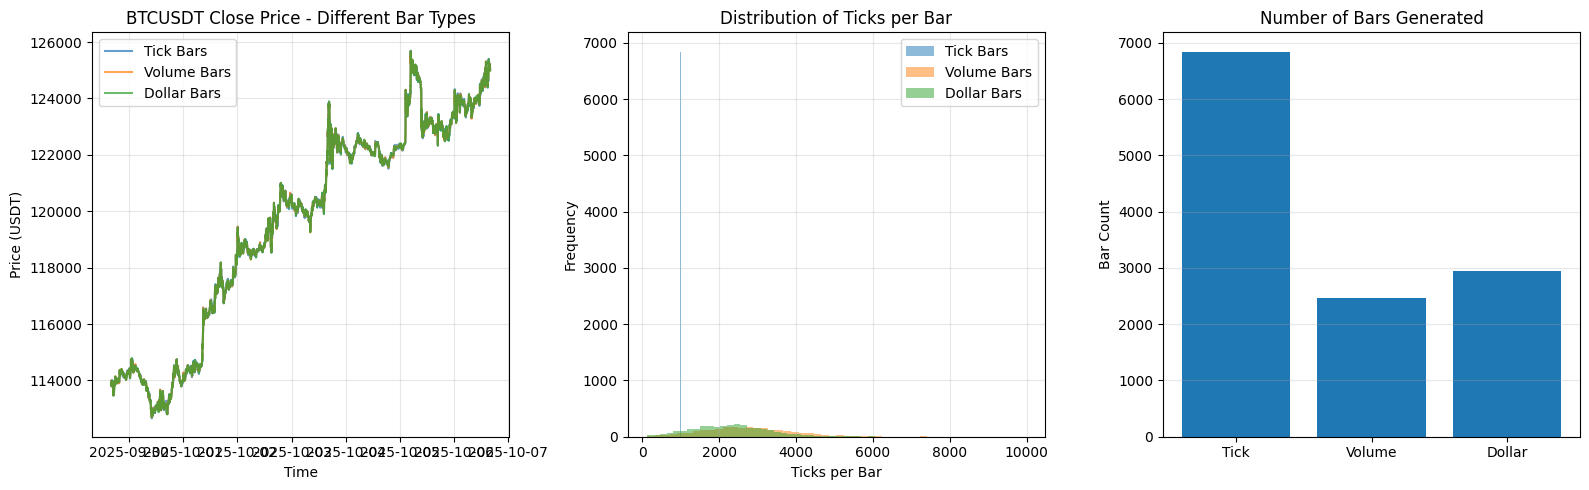


Summary Statistics:
Tick Bars: 6,847 bars, avg 1000 ticks/bar
Volume Bars: 2,463 bars, avg 2780 ticks/bar
Dollar Bars: 2,948 bars, avg 2322 ticks/bar


In [7]:
# ### 2.4 Visualise Standard Bars

# %%
# Compare bar counts
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Price using different bar types
axes[0].plot(t_bars.index, t_bars['close'], label='Tick Bars', alpha=0.7)
axes[0].plot(v_bars.index, v_bars['close'], label='Volume Bars', alpha=0.7)
axes[0].plot(d_bars.index, d_bars['close'], label='Dollar Bars', alpha=0.7)
axes[0].set_title(f'{SYMBOL} Close Price - Different Bar Types')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Price (USDT)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Bar tick counts distribution
axes[1].hist(t_bars['tick_count'], bins=50, alpha=0.5, label='Tick Bars')
axes[1].hist(v_bars['tick_count'], bins=50, alpha=0.5, label='Volume Bars')
axes[1].hist(d_bars['tick_count'], bins=50, alpha=0.5, label='Dollar Bars')
axes[1].set_title('Distribution of Ticks per Bar')
axes[1].set_xlabel('Ticks per Bar')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Bar counts comparison
bar_types = ['Tick', 'Volume', 'Dollar']
bar_counts = [len(t_bars), len(v_bars), len(d_bars)]
axes[2].bar(bar_types, bar_counts)
axes[2].set_title('Number of Bars Generated')
axes[2].set_ylabel('Bar Count')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nSummary Statistics:")
print(f"Tick Bars: {len(t_bars):,} bars, avg {t_bars['tick_count'].mean():.0f} ticks/bar")
print(f"Volume Bars: {len(v_bars):,} bars, avg {v_bars['tick_count'].mean():.0f} ticks/bar")
print(f"Dollar Bars: {len(d_bars):,} bars, avg {d_bars['tick_count'].mean():.0f} ticks/bar")

In [8]:
# ## 3. Imbalance Bars
#
# Imbalance bars sample when the cumulative order flow imbalance exceeds expectations.
# These bars capture periods of sustained buying or selling pressure.

# %%
# Generate imbalance bars
NUM_PREV_BARS = 3
EXPECTED_WINDOW = 10000

print(f"Generating imbalance bars (window: {EXPECTED_WINDOW:,})...")

# Tick imbalance bars
tib = tick_imbalance_bars(
    tick_data,
    num_prev_bars=NUM_PREV_BARS,
    expected_imbalance_window=EXPECTED_WINDOW
)
print(f"✓ Tick Imbalance Bars: {len(tib):,}")

# Volume imbalance bars
vib = volume_imbalance_bars(
    tick_data,
    num_prev_bars=NUM_PREV_BARS,
    expected_imbalance_window=EXPECTED_WINDOW
)
print(f"✓ Volume Imbalance Bars: {len(vib):,}")

# Dollar imbalance bars
dib = dollar_imbalance_bars(
    tick_data,
    num_prev_bars=NUM_PREV_BARS,
    expected_imbalance_window=EXPECTED_WINDOW
)
print(f"✓ Dollar Imbalance Bars: {len(dib):,}")


Generating imbalance bars (window: 10,000)...
✓ Tick Imbalance Bars: 6
✓ Volume Imbalance Bars: 1
✓ Dollar Imbalance Bars: 5


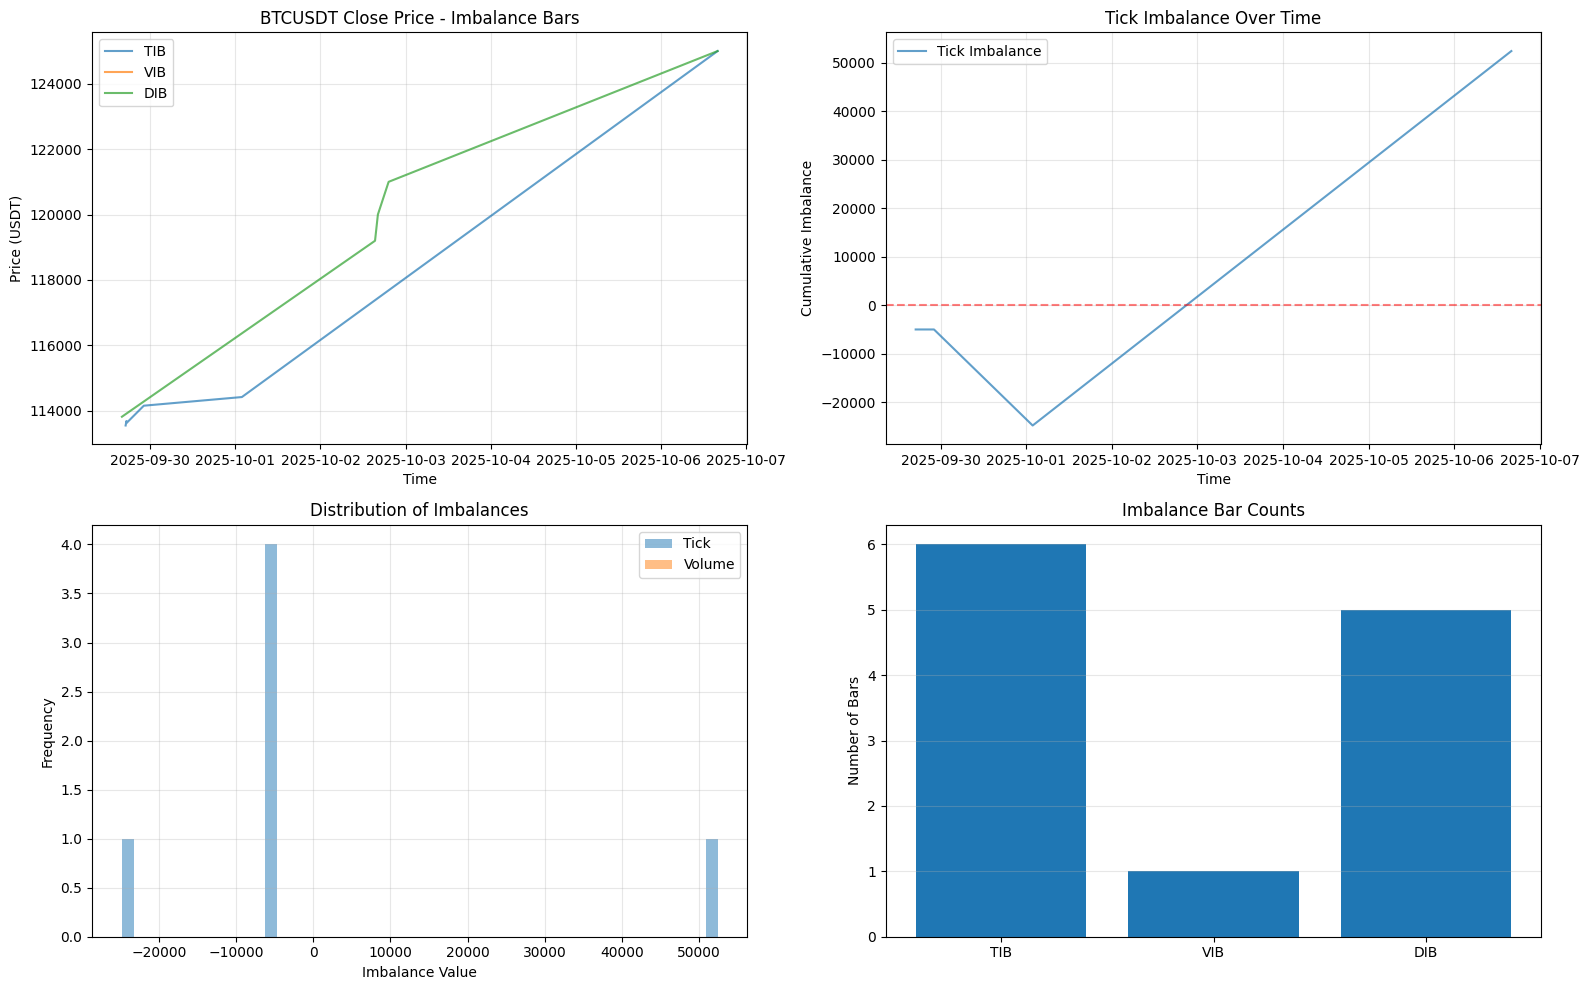

In [9]:
# ### 3.1 Visualise Imbalance Bars

# %%
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Price with imbalance bars
axes[0, 0].plot(tib.index, tib['close'], label='TIB', alpha=0.7)
axes[0, 0].plot(vib.index, vib['close'], label='VIB', alpha=0.7)
axes[0, 0].plot(dib.index, dib['close'], label='DIB', alpha=0.7)
axes[0, 0].set_title(f'{SYMBOL} Close Price - Imbalance Bars')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Price (USDT)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Imbalance values over time
axes[0, 1].plot(tib.index, tib['imbalance'], label='Tick Imbalance', alpha=0.7)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Tick Imbalance Over Time')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Cumulative Imbalance')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Distribution of imbalances
axes[1, 0].hist(tib['imbalance'], bins=50, alpha=0.5, label='Tick')
axes[1, 0].hist(vib['imbalance'], bins=50, alpha=0.5, label='Volume')
axes[1, 0].set_title('Distribution of Imbalances')
axes[1, 0].set_xlabel('Imbalance Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Bar counts
bar_types = ['TIB', 'VIB', 'DIB']
bar_counts = [len(tib), len(vib), len(dib)]
axes[1, 1].bar(bar_types, bar_counts)
axes[1, 1].set_title('Imbalance Bar Counts')
axes[1, 1].set_ylabel('Number of Bars')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [10]:
# ## 4. Runs Bars
#
# Runs bars sample based on sequences of consecutive buys or sells.
# They capture momentum and trend persistence in the market.

# %%
# Generate runs bars
print(f"Generating runs bars (window: {EXPECTED_WINDOW:,})...")

# Tick runs bars
trb = tick_runs_bars(
    tick_data,
    num_prev_bars=NUM_PREV_BARS,
    expected_runs_window=EXPECTED_WINDOW
)
print(f"✓ Tick Runs Bars: {len(trb):,}")

# Volume runs bars
vrb = volume_runs_bars(
    tick_data,
    num_prev_bars=NUM_PREV_BARS,
    expected_runs_window=EXPECTED_WINDOW
)
print(f"✓ Volume Runs Bars: {len(vrb):,}")

# Dollar runs bars
drb = dollar_runs_bars(
    tick_data,
    num_prev_bars=NUM_PREV_BARS,
    expected_runs_window=EXPECTED_WINDOW
)
print(f"✓ Dollar Runs Bars: {len(drb):,}")

Generating runs bars (window: 10,000)...


KeyboardInterrupt: 

In [ ]:
# ### 4.1 Visualise Runs Bars

# %%
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Price with runs bars
axes[0, 0].plot(trb.index, trb['close'], label='TRB', alpha=0.7)
axes[0, 0].plot(vrb.index, vrb['close'], label='VRB', alpha=0.7)
axes[0, 0].plot(drb.index, drb['close'], label='DRB', alpha=0.7)
axes[0, 0].set_title(f'{SYMBOL} Close Price - Runs Bars')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Price (USDT)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Maximum runs over time
axes[0, 1].plot(trb.index, trb['max_run'], label='Tick Runs', alpha=0.7)
axes[0, 1].set_title('Maximum Runs Over Time')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Max Run Length')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Distribution of run lengths
axes[1, 0].hist(trb['max_run'], bins=50, alpha=0.7, label='Tick Runs')
axes[1, 0].set_title('Distribution of Run Lengths')
axes[1, 0].set_xlabel('Run Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Bar counts
bar_types = ['TRB', 'VRB', 'DRB']
bar_counts = [len(trb), len(vrb), len(drb)]
axes[1, 1].bar(bar_types, bar_counts)
axes[1, 1].set_title('Runs Bar Counts')
axes[1, 1].set_ylabel('Number of Bars')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# ## 5. Statistical Comparison
#
# Compare the statistical properties of different bar types.
# Information-driven bars should show:
# - Better normality in returns
# - More stable variance
# - Lower autocorrelation

# %%
from scipy import stats

def analyse_returns(bars, name):
    """Calculate and display return statistics."""
    # Calculate log returns
    returns = np.log(bars['close'] / bars['close'].shift(1)).dropna()

    # Statistics
    mean = returns.mean()
    std = returns.std()
    skew = stats.skew(returns)
    kurt = stats.kurtosis(returns)

    # Normality test (Jarque-Bera)
    jb_stat, jb_pval = stats.jarque_bera(returns)

    print(f"\n{name}:")
    print(f"  Mean: {mean:.6f}")
    print(f"  Std Dev: {std:.6f}")
    print(f"  Skewness: {skew:.4f}")
    print(f"  Kurtosis: {kurt:.4f}")
    print(f"  Jarque-Bera: {jb_stat:.2f} (p={jb_pval:.4f})")
    print(f"  Normal? {'Yes' if jb_pval > 0.05 else 'No'}")

    return returns

# Compare standard bars
print("=" * 60)
print("STATISTICAL COMPARISON - Standard Bars")
print("=" * 60)

tick_returns = analyse_returns(t_bars, "Tick Bars")
volume_returns = analyse_returns(v_bars, "Volume Bars")
dollar_returns = analyse_returns(d_bars, "Dollar Bars")

In [ ]:
# ### 5.1 Visualise Return Distributions

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Tick bars
axes[0].hist(tick_returns, bins=50, density=True, alpha=0.7, label='Tick Bars')
axes[0].set_title('Tick Bar Returns Distribution')
axes[0].set_xlabel('Log Returns')
axes[0].set_ylabel('Density')
axes[0].grid(True, alpha=0.3)

# Volume bars
axes[1].hist(volume_returns, bins=50, density=True, alpha=0.7, label='Volume Bars', color='orange')
axes[1].set_title('Volume Bar Returns Distribution')
axes[1].set_xlabel('Log Returns')
axes[1].set_ylabel('Density')
axes[1].grid(True, alpha=0.3)

# Dollar bars
axes[2].hist(dollar_returns, bins=50, density=True, alpha=0.7, label='Dollar Bars', color='green')
axes[2].set_title('Dollar Bar Returns Distribution')
axes[2].set_xlabel('Log Returns')
axes[2].set_ylabel('Density')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ## 6. Summary and Conclusions

# Create summary table
summary_data = {
    'Bar Type': ['Tick', 'Volume', 'Dollar', 'Tick Imbalance', 'Volume Imbalance',
                 'Dollar Imbalance', 'Tick Runs', 'Volume Runs', 'Dollar Runs'],
    'Count': [len(t_bars), len(v_bars), len(d_bars), len(tib), len(vib),
              len(dib), len(trb), len(vrb), len(drb)],
    'Avg Ticks/Bar': [
        t_bars['tick_count'].mean(),
        v_bars['tick_count'].mean(),
        d_bars['tick_count'].mean(),
        tib['tick_count'].mean(),
        vib['tick_count'].mean(),
        dib['tick_count'].mean(),
        trb['tick_count'].mean(),
        vrb['tick_count'].mean(),
        drb['tick_count'].mean()
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df['Avg Ticks/Bar'] = summary_df['Avg Ticks/Bar'].round(0).astype(int)

print("\n" + "=" * 60)
print(f"SUMMARY - Information-Driven Bars for {SYMBOL}")
print("=" * 60)
print(summary_df.to_string(index=False))
print("\n" + "=" * 60)

print("\n✓ All bar types generated successfully!")
print(f"\nTotal ticks processed: {len(tick_data):,}")
print(f"Time period: {DAYS} days")

In [ ]:
# ## 7. Save Processed Bars (Optional)
#
# Uncomment the cells below to save the generated bars to parquet files.

# %%
# from utils.bar_utils import save_bars
#
# # Save standard bars
# save_bars(t_bars, SYMBOL, 'tick_bars', threshold=TICK_THRESHOLD)
# save_bars(v_bars, SYMBOL, 'volume_bars', threshold=VOLUME_THRESHOLD)
# save_bars(d_bars, SYMBOL, 'dollar_bars', threshold=DOLLAR_THRESHOLD)
#
# # Save imbalance bars
# save_bars(tib, SYMBOL, 'tick_imbalance_bars')
# save_bars(vib, SYMBOL, 'volume_imbalance_bars')
# save_bars(dib, SYMBOL, 'dollar_imbalance_bars')
#
# # Save runs bars
# save_bars(trb, SYMBOL, 'tick_runs_bars')
# save_bars(vrb, SYMBOL, 'volume_runs_bars')
# save_bars(drb, SYMBOL, 'dollar_runs_bars')
#
# print("✓ All bars saved to processed_data/")